# Covid-19 India Data Analysis

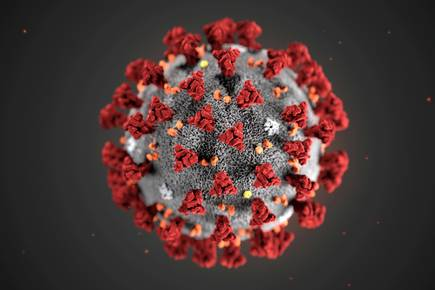

Data set is collected from kaggle:https://www.kaggle.com/imdevskp/covid19-corona-virus-india-dataset

**Context**:

  - January 30 The first case of the COVID-19 in India was reported, originating from China.
  - March 14: Central government declares COVID-19 a 'notified disaster'
  - March 15: The number of positive cases crosses 100
  - March 24: Prime Minister Narendra Modi announces 21-day lockdown
  - March 30: The number of positive cases crosses 1000

**Aim**
    
  - This Project Completely focuses on Data analysis of Covid19 in Indian.
  - Let's Perform Various Analysis inorder to find the insights behind how rampant covid19 in India.
    

### Importing Necessary Libraries




In [12]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

### Reading CSV

In [14]:
patients=pd.read_csv("Data/patients_data.csv")

In [15]:
patients.head()

,Patient Number,State Patient Number,Date Announced,Estimated Onset Date,Age Bracket,Gender,Detected City,Detected District,Detected State,State code,...,Nationality,Type of transmission,Status Change Date,Source_1,Source_2,Source_3,Backup Notes,Num cases,Entry_ID,Num Cases
0,1.0,KL-TS-P1,30/01/2020,NaN,20,F,Thrissur,Thrissur,Kerala,KL,...,India,Imported,14/02/2020,https://twitter.com/vijayanpinarayi/status/122...,https://weather.com/en-IN/india/news/news/2020...,NaN,Student from Wuhan,1.0,NaN,NaN
1,2.0,KL-AL-P1,02/02/2020,NaN,NaN,NaN,Alappuzha,Alappuzha,Kerala,KL,...,India,Imported,14/02/2020,https://www.indiatoday.in/india/story/kerala-r...,https://weather.com/en-IN/india/news/news/2020...,NaN,Student from Wuhan,1.0,NaN,NaN
2,3.0,KL-KS-P1,03/02/2020,NaN,NaN,NaN,Kasaragod,Kasaragod,Kerala,KL,...,India,Imported,14/02/2020,https://www.indiatoday.in/india/story/kerala-n...,https://twitter.com/ANI/status/122422148580539...,https://weather.com/en-IN/india/news/news/2020...,Student from Wuhan,1.0,NaN,NaN
3,4.0,DL-P1,02/03/2020,NaN,45,M,East Delhi (Mayur Vihar),East Delhi,Delhi,DL,...,India,Imported,15/03/2020,https://www.indiatoday.in/india/story/not-a-ja...,https://economictimes.indiatimes.com/news/poli...,NaN,Travel history to Italy and Austria,1.0,NaN,NaN
4,5.0,TS-P1,02/03/2020,NaN,24,M,Hyderabad,Hyderabad,Telangana,TG,...,India,Imported,02/03/2020,https://www.deccanherald.com/national/south/qu...,https://www.indiatoday.in/india/story/coronavi...,https://www.thehindu.com/news/national/coronav...,"Travel history to Dubai, Singapore contact",1.0,NaN,NaN


In [16]:
patients.shape

(100284, 23)

In [17]:
state_test=pd.read_csv("Data/tests_state_wise.csv")

In [18]:
state_test.head()

,Updated On,State,Total Tested,Tag (Total Tested),Positive,Negative,Unconfirmed,Cumulative People In Quarantine,Total People Currently in Quarantine,Tag (People in Quarantine),...,Num Calls State Helpline,Source1,Unnamed: 21,Source2,Unnamed: 23,Test positivity rate,Tests per thousand,Tests per million,Tests per positive case,Population NCP 2019 Projection
0,17/04/2020,Andaman and Nicobar Islands,1403.0,Samples Sent,12.0,1210,181.0,NaN,NaN,NaN,...,NaN,https://t.me/indiacovid/2550,NaN,NaN,NaN,0.86%,3.53,3534.0,117.0,397000.0
1,24/04/2020,Andaman and Nicobar Islands,2679.0,Samples Sent,27.0,NaN,246.0,NaN,614.0,Institutional,...,280.0,https://t.me/indiacovid/3147?single,NaN,NaN,NaN,1.01%,6.75,6748.0,99.0,397000.0
2,27/04/2020,Andaman and Nicobar Islands,2848.0,Samples Sent,33.0,NaN,106.0,NaN,724.0,Institutional,...,298.0,https://t.me/indiacovid/3365?single,NaN,NaN,NaN,1.16%,7.17,7174.0,86.0,397000.0
3,01/05/2020,Andaman and Nicobar Islands,3754.0,Samples Sent,33.0,NaN,199.0,NaN,643.0,Institutional,...,340.0,https://t.me/indiacovid/3781,NaN,NaN,NaN,0.88%,9.46,9456.0,114.0,397000.0
4,16/05/2020,Andaman and Nicobar Islands,6677.0,Samples Sent,33.0,NaN,136.0,NaN,16.0,Institutional,...,471.0,https://t.me/indiacovid/4925,NaN,NaN,NaN,0.49%,16.82,16819.0,202.0,397000.0
